In [1]:
# %load ../imports.py
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
DATASET_PATH = '../../dataset/private/housing.csv'
COLUMN_NAMES = [
    'CR', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
FEATURES = [
    'CR', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',
]
TARGET = 'MEDV'

In [3]:
data = pd.read_csv(
    DATASET_PATH,
    header=None, 
    names=COLUMN_NAMES, 
    delim_whitespace=True
)
print("Null values:", data.isnull().any(), sep='\n')
data.head()

Null values:
CR         False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool


,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
import sklearn.metrics as sklm
def scoring_procedure(y_true, y_pred, header=''):
    abs_err = abs(y_true - y_pred)
    mse = sklm.mean_squared_error(y_true, y_pred)
    report = f"""
    {header}
    MSE: {mse:.3f}
    RMSE: {np.sqrt(mse):.3f} 
    R2: {sklm.r2_score(y_true, y_pred):.3f}
    MAPE: {sklm.mean_absolute_percentage_error(y_true, y_pred):.3f}
    """
    print(report)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = data[FEATURES], data[TARGET]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

In [6]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

linear_regression_pca = Pipeline([
    ('PCA', PCA(n_components=6)),
    ('LinearRegression', LinearRegression())
])

linear_regression_pca.fit(X_train, y_train)

Pipeline(steps=[('PCA', PCA(n_components=6)),
                ('LinearRegression', LinearRegression())])

In [8]:
from sklearn.svm import NuSVR

svr_rbf = NuSVR(kernel='rbf', nu=0.95)
svr_poly_2 = NuSVR(kernel='poly', degree=2, nu=0.95)
svr_poly_3 = NuSVR(kernel='poly', degree=3, nu=0.95)

svr_rbf.fit(X_train, y_train)
svr_poly_2.fit(X_train, y_train)
svr_poly_3.fit(X_train, y_train)

NuSVR(kernel='poly', nu=0.95)

In [9]:
svr_rbf_pca = Pipeline([
    ('PCA', PCA(n_components=6)),
    ('SVR_RBF', NuSVR(nu=0.95, kernel='rbf'))
])

svr_rbf_pca.fit(X_train, y_train)

Pipeline(steps=[('PCA', PCA(n_components=6)), ('SVR_RBF', NuSVR(nu=0.95))])

In [10]:
models_linear = {
    'LinearRegression': linear_regression,
    'LinearRegression_PCA': linear_regression_pca,
}

for model in models_linear:
    scoring_procedure(y_test, models_linear[model].predict(X_test), model)


    LinearRegression
    MSE: 33.449
    RMSE: 5.784 
    R2: 0.589
    MAPE: 0.184
    

    LinearRegression_PCA
    MSE: 39.612
    RMSE: 6.294 
    R2: 0.514
    MAPE: 0.193
    


In [11]:
models_SVR = {
    'SVR_RBF': svr_rbf,
    'SVR_RBF_PCA': svr_rbf_pca,
    'SVR_Poly_2': svr_poly_2,
    'SVR_Poly_3': svr_poly_3,
}

for model in models_SVR:
    scoring_procedure(y_test, models_SVR[model].predict(X_test), model)


    SVR_RBF
    MSE: 41.021
    RMSE: 6.405 
    R2: 0.496
    MAPE: 0.169
    

    SVR_RBF_PCA
    MSE: 42.990
    RMSE: 6.557 
    R2: 0.472
    MAPE: 0.166
    

    SVR_Poly_2
    MSE: 52.811
    RMSE: 7.267 
    R2: 0.351
    MAPE: 0.222
    

    SVR_Poly_3
    MSE: 45.151
    RMSE: 6.719 
    R2: 0.446
    MAPE: 0.181
    


In [16]:
print('Train performance')
scoring_procedure(y_train, svr_poly_2.predict(X_train), 'SVR_Poly_2')
scoring_procedure(y_train, svr_poly_3.predict(X_train), 'SVR_Poly_3')

Train performance

    SVR_Poly_2
    MSE: 37.813
    RMSE: 6.149 
    R2: 0.556
    MAPE: 0.196
    

    SVR_Poly_3
    MSE: 22.799
    RMSE: 4.775 
    R2: 0.732
    MAPE: 0.131
    


Значительно более низкая ошибка и высокий R2 на тренировочном датасете указывают на то, что полиномиальные модели переобучились.

In [12]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error'
    )
    plt.plot(train_sizes, -train_scores.mean(1), label='Train')
    plt.plot(train_sizes, -val_scores.mean(1), label='Validation')
    plt.xlabel('Training set size')
    plt.ylabel('MSE')
    plt.legend()

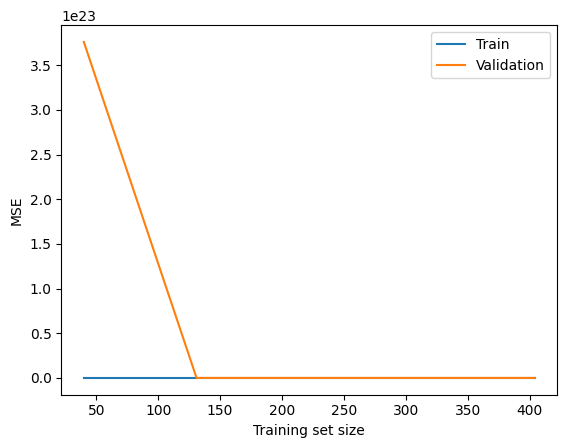

In [13]:
plot_learning_curve(LinearRegression(), X, y)

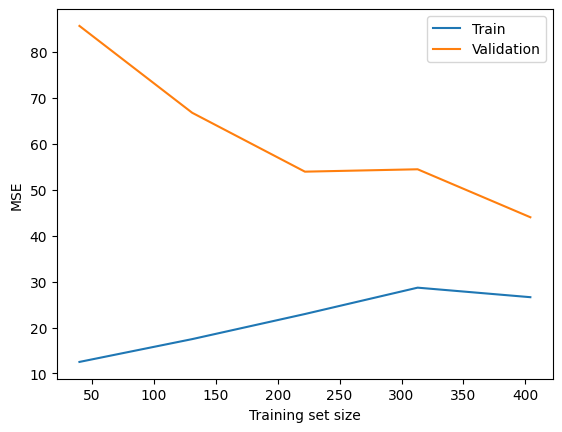

In [14]:
plot_learning_curve(NuSVR(nu=0.95, kernel='rbf'), X, y)

Наилучшими показателями обладает линейная регрессия, как показал предшествующий ковариационный анализ в ЛР-2 большинство значительных зависимостей - линейные, что также показывали высокие значения корреляции Пирсона. Без дополнительных попыток подстроить модели под данные среди выборки вариантов среди нелинейных лучше всего себя показала SVR с ядром RBF. Полиномиальные модели справились плохо, веорятно, как и из-за отсутствия искомых зависимостей, так и из-за их известной склонности к переобучению - для того, чтобы вынести по ним вердикт требуется дальнейший анализ и попытки регуляризовать их.